<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Linear Algebra 
<br>
Prof. Hamid R. Rabiee
<br>
Dr. Maryam Ramezani
</font>
<br/>
<br/>
Fall 2022

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - Q1 <br>
Watermark Images using SVD

(35% of the overall project grade)
            	<br/>
			</font>
<font size=4>
			<br/><br/>
<font color=red>
Please run all the cells.
     </font>
</font>
<br>
<font size=3 color=grey>
</font>
    </div>

Name: Parham Rezaei
<br>
Student Number: 400108547

# Watermark

A watermark is an image, overlay, or text that's placed over a digital asset. Usually, the image will be monochromatic and transparent, to enable others to still view the asset. You can read about the importance of the watermark in this [link](https://www.mediavalet.com/blog/watermarks-are-important/#).

# Add Watermark

## Imports

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

## Load & Show Images
If you are using colab, you can upload the files by running the following cell.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dog.png to dog.png
Saving logo.png to logo.png


In the following cell, load the original image and the logo from the folder add_watermark and plot them using the ```cv2``` library. 

Note: both the image and the logo should be gray-scale.

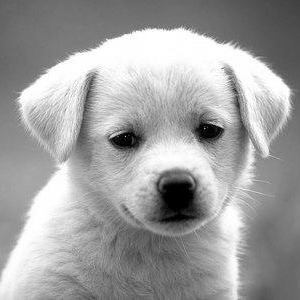

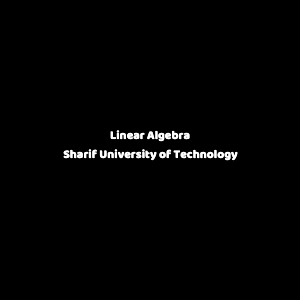

In [7]:
original_img = None
watermark_img = None
##################
#   Code here    #
img_dog = Image.open('dog.png').convert('L')
img_dog = np.array(img_dog)
cv2_imshow(img_dog)
img_logo = Image.open('logo.png').convert('L')
img_logo = np.array(img_logo)
cv2_imshow(img_logo)

#   5 points     #
##################

## Implementation [50 points]

In this part you should add watermark to the original image. You should implement the following algorithm.

1. Perform SVD on the original image (A matrix) and form the result as $USV^T$.

2. Add watermark (W matrix), muliplied by a coefficine K, to the SVs of the original matrix. (S matrix in the previous step)

3. Now, perform SVD again on matrix D.

4. Replace the matrix S in the first step, with the SVs of the previous step (the middle matrix in step 3) to get the watermarked image.



In [8]:
def encode_watermark(original_img, watermark_img, watermarked_coeff=0.7):
    """
    Args:
        original_img (numpy.ndarray): Original Image
        watermark_image (numpy.ndarray): Watermark Image

    Returns:
        numpy.ndarray: Watermarked Image
    """
    ##################
    #  Code here     #
    (U,S,Vh)=np.linalg.svd(original_img)
    S1 = np.diag(S) + watermarked_coeff*watermark_img
    (U_S1,S_S1,Vh_S1) = np.linalg.svd(S1)
    watermarked_image = U @ np.diag(S_S1) @ Vh
    return watermarked_image
    #  40 points     #
    ##################

    return watermarked_image

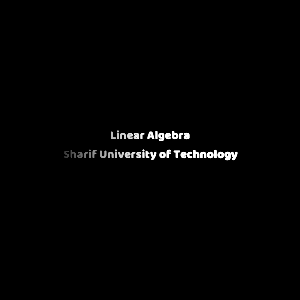

In [33]:
# sample to test extracting this watermark

# (U,S,Vh)=np.linalg.svd(img_dog)
# S1 = np.diag(S) + img_logo
# (U_S1,S_S1,Vh_S1) = np.linalg.svd(S1)
# watermarked_image = U @ np.diag(S_S1) @ Vh
# show_logo_k(0.7,w_img=watermarked_image, w_u=U_S1, SS=S, w_vh=Vh_S1)

Display the watermarked image. 

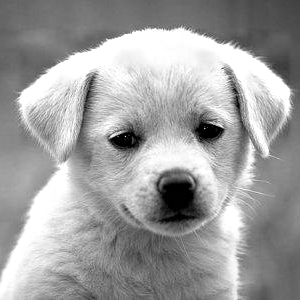

In [9]:
##################
#  Code here     #
dd = encode_watermark(img_dog,img_logo)
cv2_imshow(dd)
#  5 points      #
##################

Explain about the place you added the logo. How is the watermarked image visually different from the original image? [5 points]

Answer: The logo has been added to and changed the singular values. Looking at the shot, you cannot see it. We can avoid losing the watermark by cropping or the like because it is not printed on a specific area of a photo.

# Watermark Extraction [45 points]

## Load Files

In [10]:
from google.colab import files
uploaded = files.upload()

Saving logo2.jpg to logo2.jpg
Saving S.npy to S.npy
Saving watermarked_image.jpg to watermarked_image.jpg
Saving watermarked_u.npy to watermarked_u.npy
Saving watermarked_vh.npy to watermarked_vh.npy


In [11]:
watermarked_u = np.load('watermarked_u.npy')
watermarked_vh = np.load('watermarked_vh.npy')
S = np.load('S.npy')
watermarked_img = cv2.imread('watermarked_image.jpg', 0)

## Implementation 

The task in this part is to extract the watermarked image from a distorted one ($A^*_w$ matrix) and write the sentence that is written in the watermarked image. The matrix of singular values (S) from the original image, $U_w$, $V^T_w$, and the watermarked image are given to you.

1. Perform SVD on the distorted watermarked image ($A^*_w$ matrix) in the form of $U^* S^*_w V^{*T}$.

2. Compute the matrix that includes the watermark by $D^* = U_w S^*_w V^T_w$.

3. Compute the corrupted watermark by subtracting the matrix $S$ from $D^*$ and dividing the result by the coefficient of the watermark, $K$.


In [12]:
def get_watermark(watermarked_img, watermarked_u, S, watermarked_vh, watermarked_coeff):
    ##################
    #  Code here     #
    Ust, Swst, Vhst = np.linalg.svd(watermarked_img)
    Dst = watermarked_u @ np.diag(Swst) @ watermarked_vh
    watermark = Dst - S
    watermark /= watermarked_coeff
    #  35 points     #
    ##################
  
    return watermark


Get the watermark logo and display it. Note that in this section we do not know the watermark coefficient. You have to run the previous cell's function for at least 5 different coefficients and compare the results.   

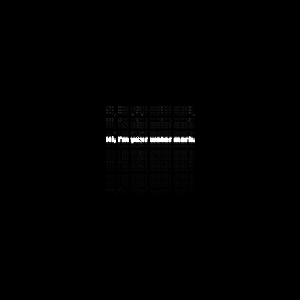

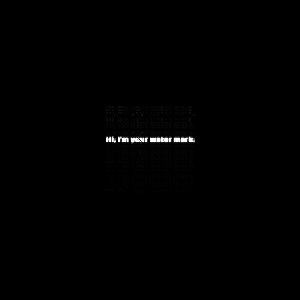

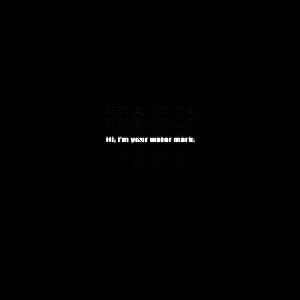

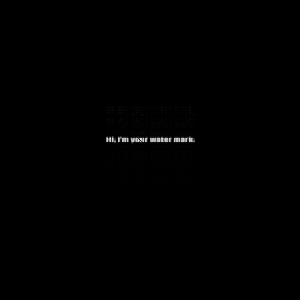

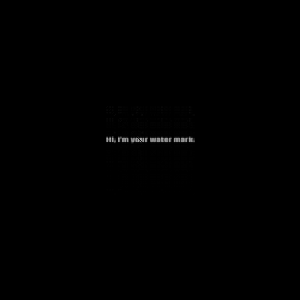

In [14]:
##################
#  Code here     #
def show_logo_k(k,w_img=watermarked_img, w_u=watermarked_u, SS=S, w_vh=watermarked_vh):
  w = get_watermark(w_img, w_u, SS, w_vh,k)
  cv2_imshow(w)
show_logo_k(0.2)
show_logo_k(0.4)
show_logo_k(0.5)
show_logo_k(0.7)
show_logo_k(0.95)

#  5 points      #
##################

Explain the effect of different coefficient values on the quality of the displayed logo. [5 points]

Answer:
When the coefficient increases the intensity of the distortion becomes less so the logo becomes more transparent.

determines the level of visibility and robustness of the watermark in the image.

A higher coefficient means a stronger watermark, which is more visible and less likely to be destroyed by image processing operations, but it may also introduce more distortions to the original image. On the other hand, a lower coefficient means a weaker watermark, which is less visible and more susceptible to image processing operations, but it also introduces less distortions to the original image.